## Estandarización

In [7]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Métodos de estandarización
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [8]:
df = pd.read_csv('../Datos/vinos_norm.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,982,635.0,14.026740
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,16,11.0,3.141178


In [9]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,982,635.0,14.026740
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,16,11.0,3.141178
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,350,426.0,12.485975
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,42,11.0,3.141178
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,249,173.0,9.459458


`Sklearn StandardScaler`

In [10]:
# iniciamos el método para escalar

scaler = StandardScaler()

Recordemos que la estandarización solo se hace para las variables predictoras. Por lo tanto, lo primero que tenemos que hacer es quitar de nuestro dataframe de "numericas" la columna de la variable respuesta, y algunas otras que no es necesario estandarizar.

In [11]:
numericas = numericas.drop(['year_birth', 'id', 'kidhome', 'teenhome', 'mntwines', 'mntwines_sin_cero', 'mnt_wines_box' ], axis = 1)
numericas.head(2)

,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,58138.0,58,88,546,172,88,88,3,8,10,4,7,982
1,46344.0,38,1,6,2,1,6,2,1,1,2,5,16


In [12]:
# ajustamos nuestros datos.  

scaler.fit(numericas)

StandardScaler()

In [13]:
# transformamos los datos

X_escaladas = scaler.transform(numericas)

In [14]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,0.235696,0.307039,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116
1,-0.235454,-0.383664,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274


In [15]:
# Ahora ya tenemos todas nuestras columnas numéricas estandarizadas, chequeemos ahora cuáles son sus valores de media y desviación estándar. 

for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna income es:  -3.625262292742245e-17
La desviación estándar de la columna income es: 1.000223289050455
-------------------------------------------------------------
La media de la columna recency es:  2.2774441063181224e-17
La desviación estándar de la columna recency es: 1.0002232890504565
-------------------------------------------------------------
La media de la columna mntfruits es:  -4.1732490479213473e-17
La desviación estándar de la columna mntfruits es: 1.000223289050454
-------------------------------------------------------------
La media de la columna mntmeatproducts es:  2.493045452618097e-17
La desviación estándar de la columna mntmeatproducts es: 1.0002232890504565
-------------------------------------------------------------
La media de la columna mntfishproducts es:  5.105043372160318e-18
La desviación estándar de la columna mntfishproducts es: 1.0002232890504574
-------------------------------------------------------------
La media de la columna m

In [16]:
numericas_estandar.head(2)

,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,0.235696,0.307039,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.51089,-0.550785,0.693904,2.011116
1,-0.235454,-0.383664,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.56872,-1.166125,-0.130463,-0.845274


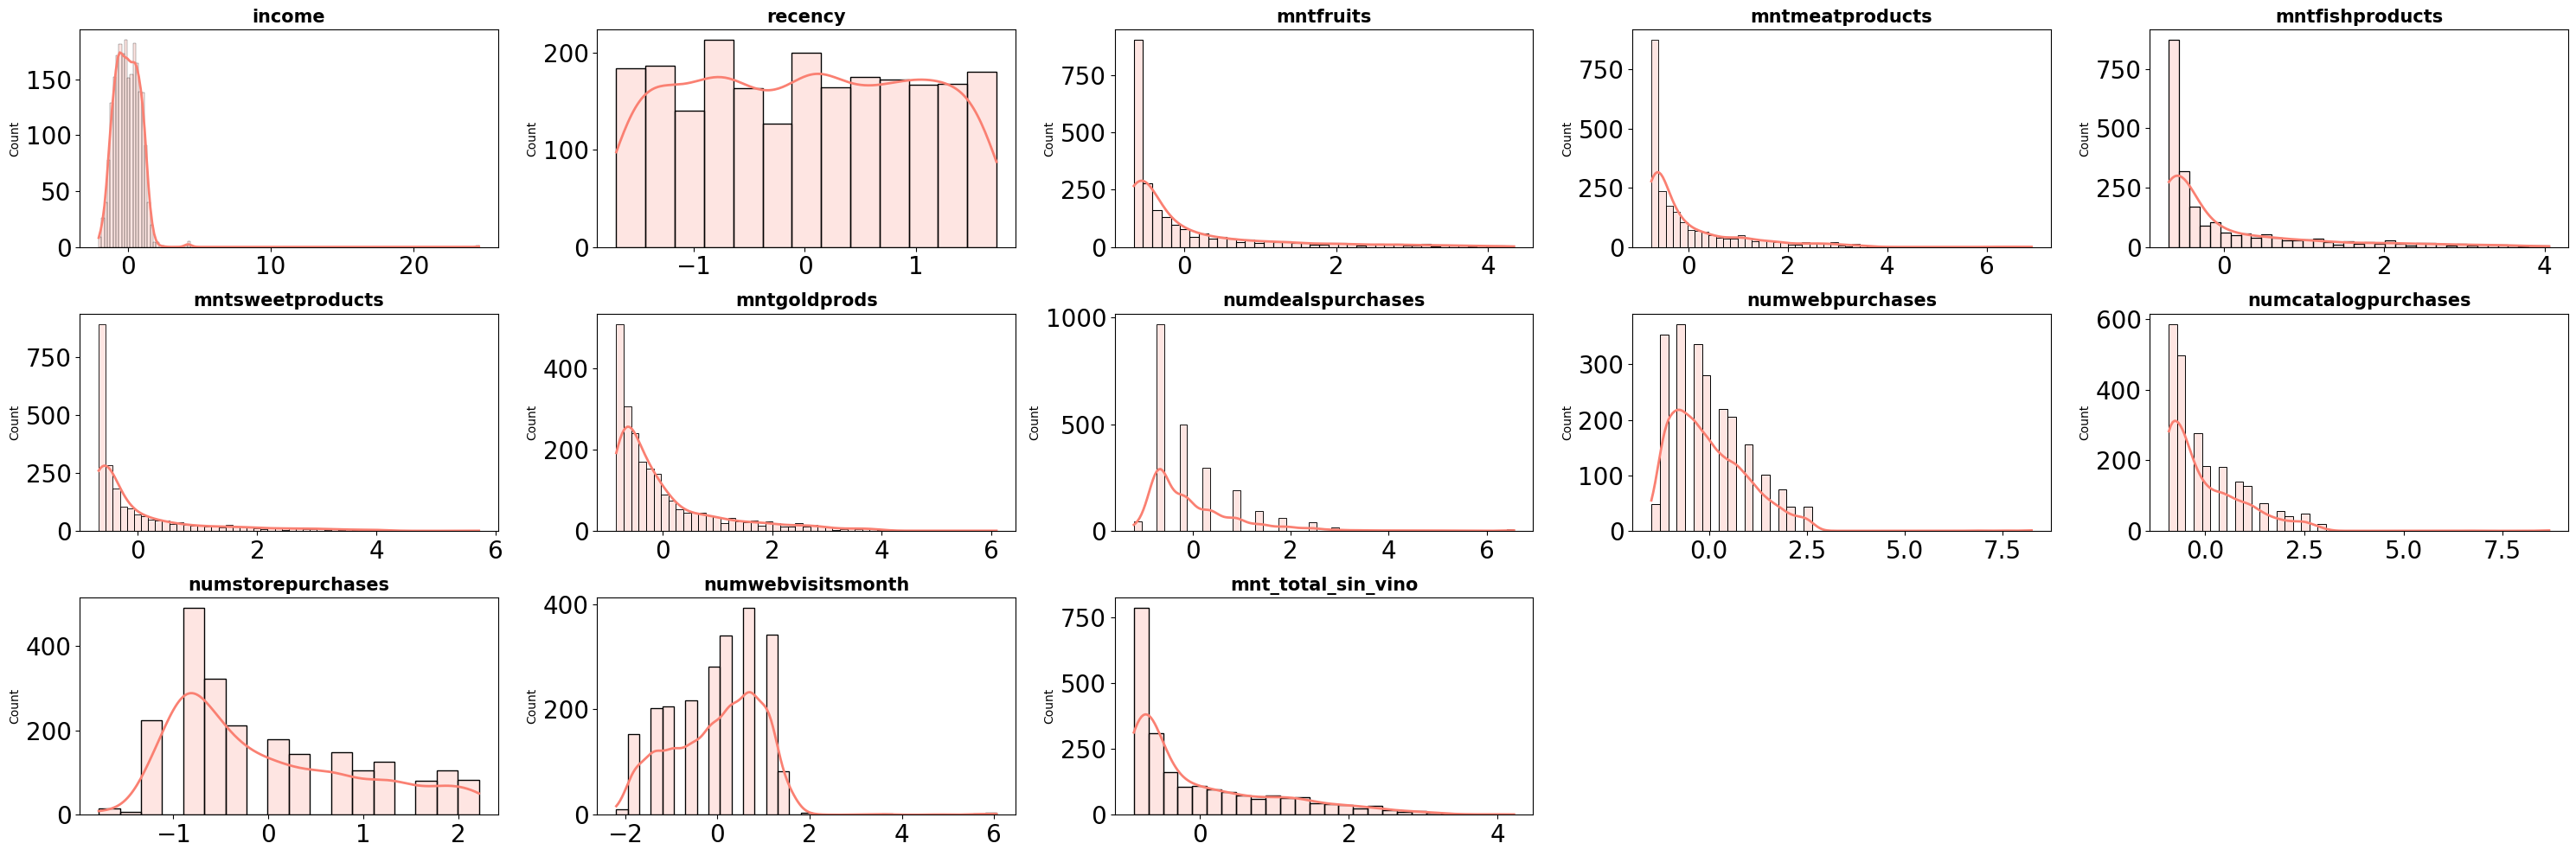

In [17]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,
        color='salmon',  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
    
    fig.tight_layout()
    
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

Comparamos con las columnas sin estandarizar para poder observar la diferencia entre ambas

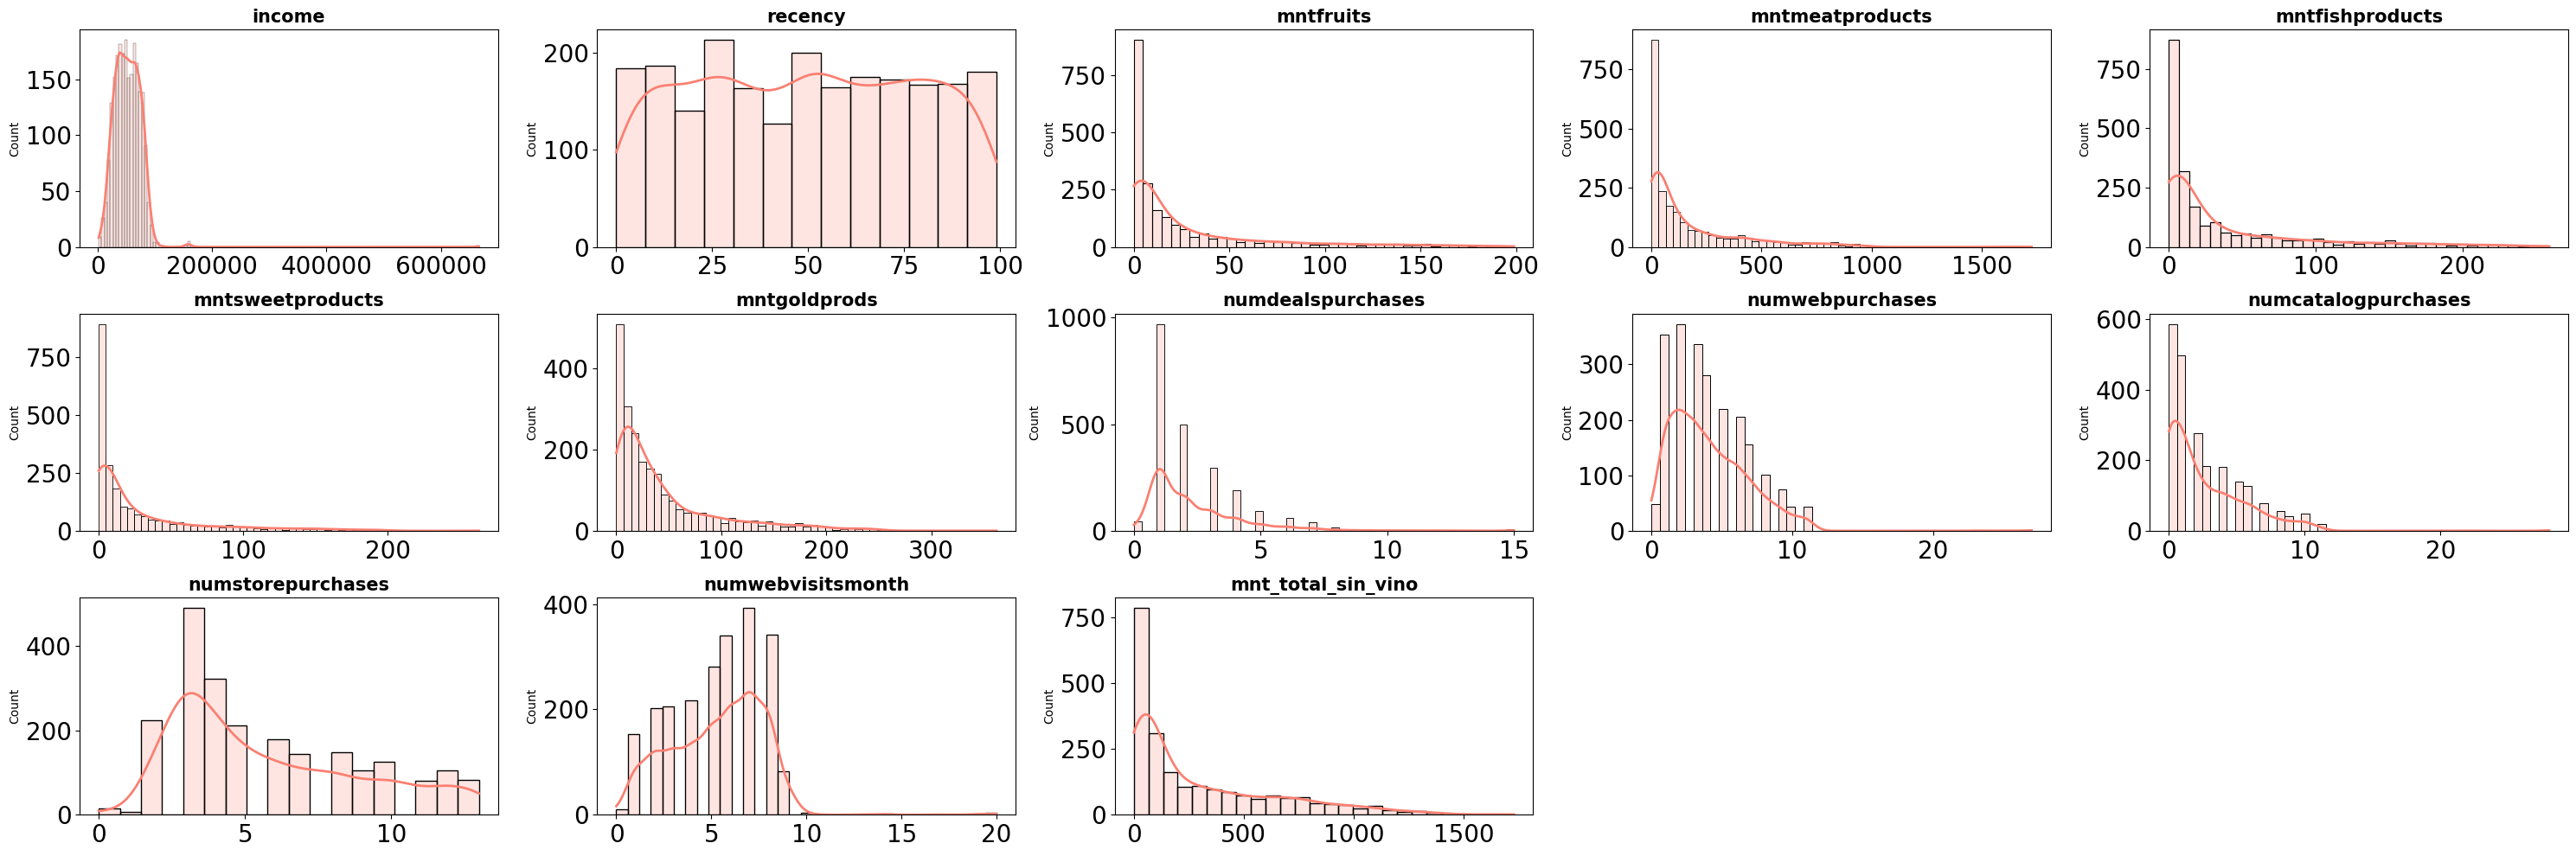

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))

columnas = numericas.columns
axes = axes.flat


for i, colum in enumerate(columnas): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True, 
        color='salmon', 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
    
    fig.tight_layout()
    
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

`RobustScaler `

In [19]:
# construir el modelo de escalador
robust = RobustScaler()

In [20]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [21]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [22]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,income,recency,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,0.206299,0.18,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,1.889702
1,-0.153812,-0.22,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,-0.284750


In [23]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna income es:  0.026151123520764916
La desviación estándar de la columna income es: 0.7644943937779577
-------------------------------------------------------------
La media de la columna recency es:  0.0021874999999999998
La desviación estándar de la columna recency es: 0.5792490561675657
-------------------------------------------------------------
La media de la columna mntfruits es:  0.5719447544642857
La desviación estándar de la columna mntfruits es: 1.2429198051430832
-------------------------------------------------------------
La media de la columna mntmeatproducts es:  0.46273148148148036
La desviación estándar de la columna mntmeatproducts es: 1.044978576443303
-------------------------------------------------------------
La media de la columna mntfishproducts es:  0.5430946048632143
La desviación estándar de la columna mntfishproducts es: 1.1623187106995252
-------------------------------------------------------------
La media de la columna mntsweetprodu

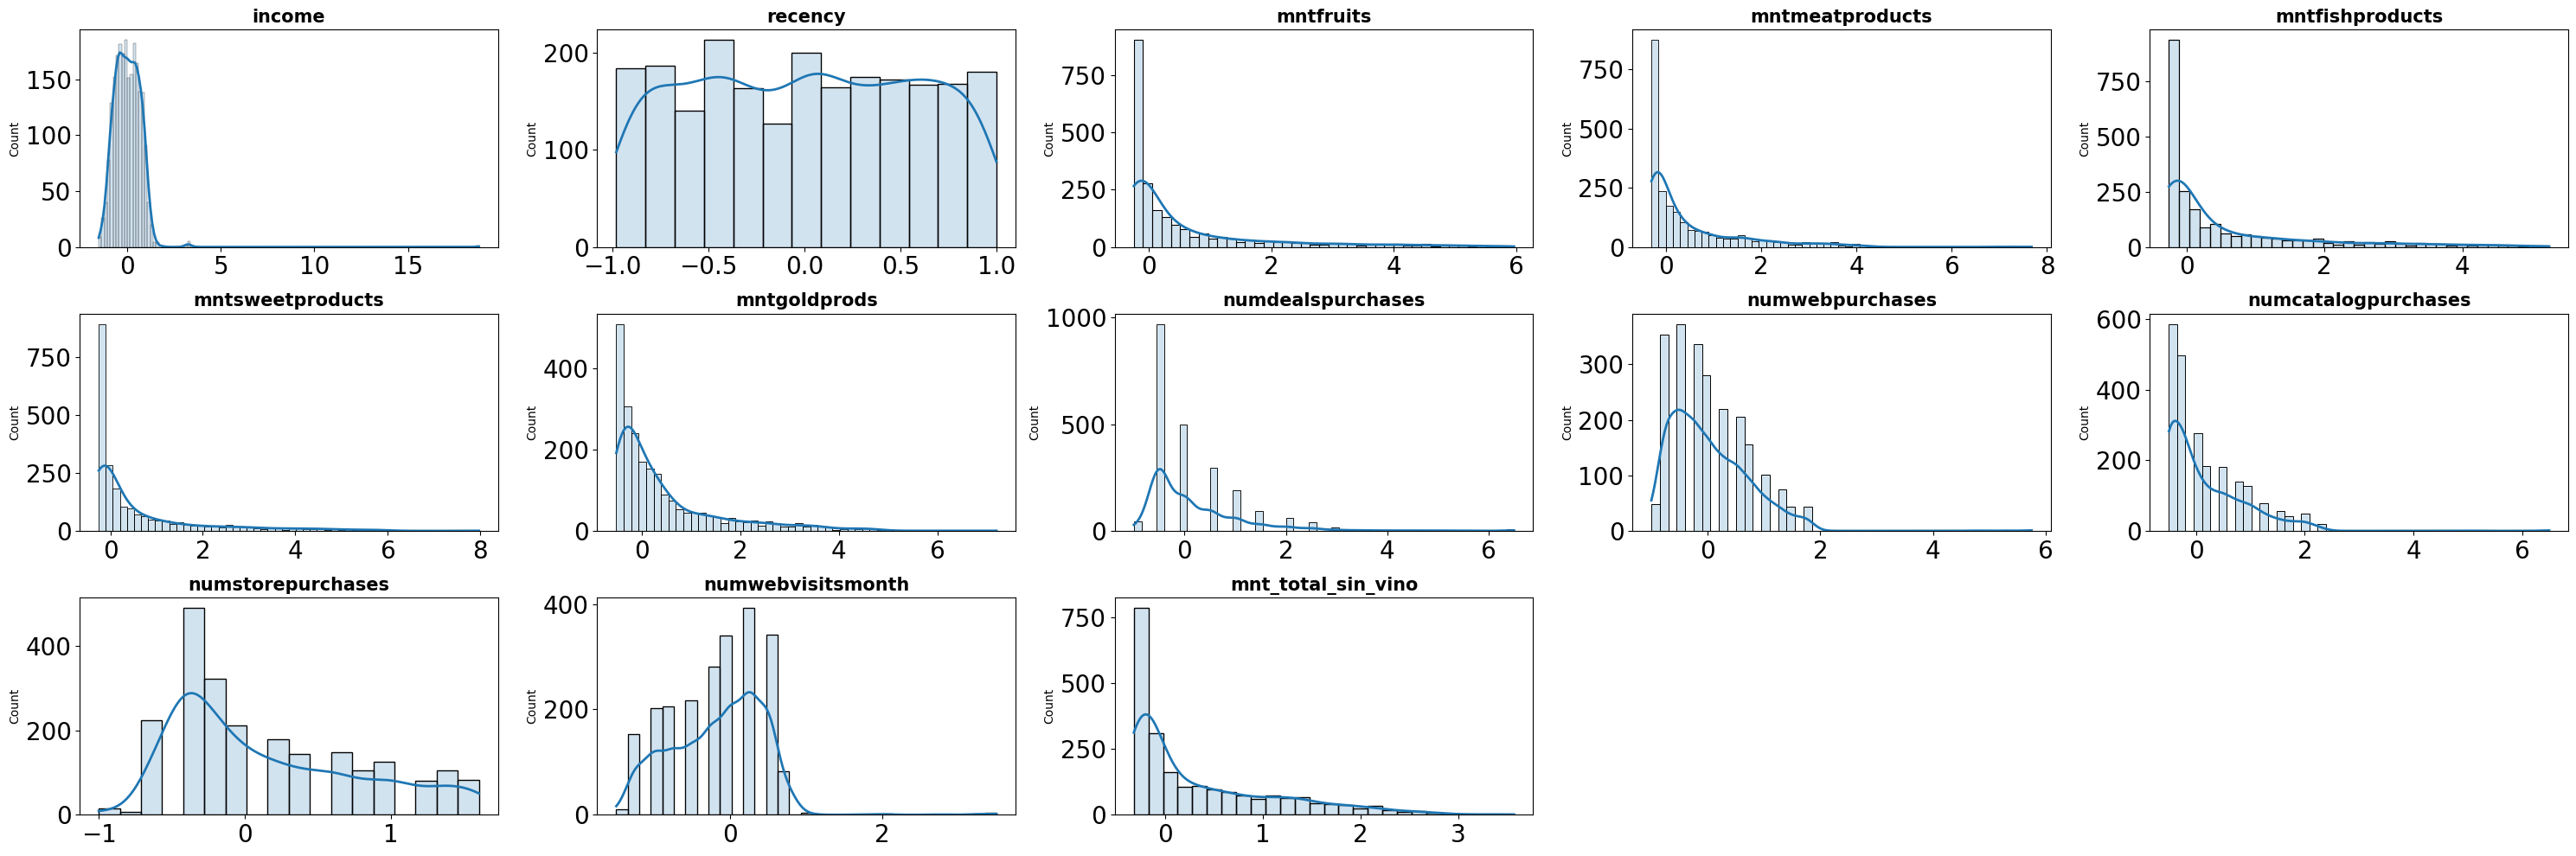

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,   
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
    fig.tight_layout()

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

Decidimos conservar el método StandardScaler debido a que es el más usado y no presenta una gran diferencia frente al RobustScaler.

In [25]:
# Juntamos los resultados de la estandarización a nuestro dataframe original.

df[numericas_estandar.columns] = numericas_estandar
df.head()


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mntwines_sin_cero,mnt_wines_box
0,5524,1957,Graduation,Single,0.235696,0,0,04-09-2012,0.307039,635,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,2.011116,635.0,14.026740
1,2174,1954,Graduation,Single,-0.235454,1,1,08-03-2014,-0.383664,11,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.845274,11.0,3.141178
2,4141,1965,Graduation,Together,0.773999,0,0,21-08-2013,-0.798086,426,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0.142339,426.0,12.485975
3,6182,1984,Graduation,Together,-1.022355,1,0,10-02-2014,-0.798086,11,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.768394,11.0,3.141178
4,5324,1981,PhD,Married,0.241888,1,0,19-01-2014,1.550305,173,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.156310,173.0,9.459458


Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [26]:
df.to_csv("../Datos/vinos_norm_estandar.csv")